In [2]:
import os
os.chdir('..')
from notebooks import config
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [3]:
## 01, 04, 16 for visualization in paper
# ids = ['01', '04', '16']
ids = ['01', '03', '16']
s1_ass, s1_dess, s1_scenes = [], [], []
s2_imgs, truths = [], []
for id in ids:
  ## get paths
  path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ id + '_s1as.tif'
  path_des = config.root_proj + '/data/dset/s1_descend/scene' + id + '_s1des.tif'
  path_s2 = config.root_proj + '/data/dset/s2_img/scene' + id + '_s2.tif'
  path_truth = config.root_proj + '/data/dset/s1_truth/scene' + id + '_wat_truth.tif'
  ## read in
  s1_as, s1_as_info = readTiff(path_as)
  s1_des, s1_des_info = readTiff(path_des)
  truth, truth_info = readTiff(path_truth)
  s2_img, s2_img_info = readTiff(path_s2)
  s1_scene = np.concatenate((s1_as, s1_des), axis=-1)
  ## append images
  s1_ass.append(s1_as); s1_dess.append(s1_des); s1_scenes.append(s1_scene)
  s2_imgs.append(s2_img); truths.append(truth)

len(s1_scenes)


3

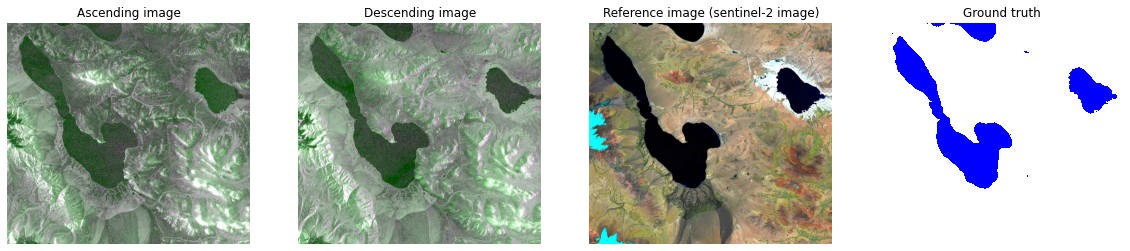

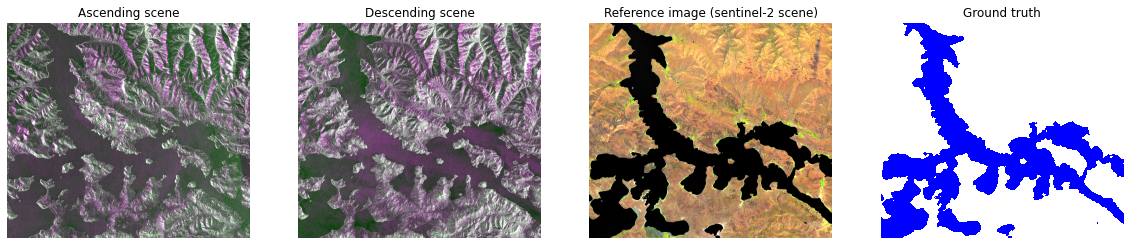

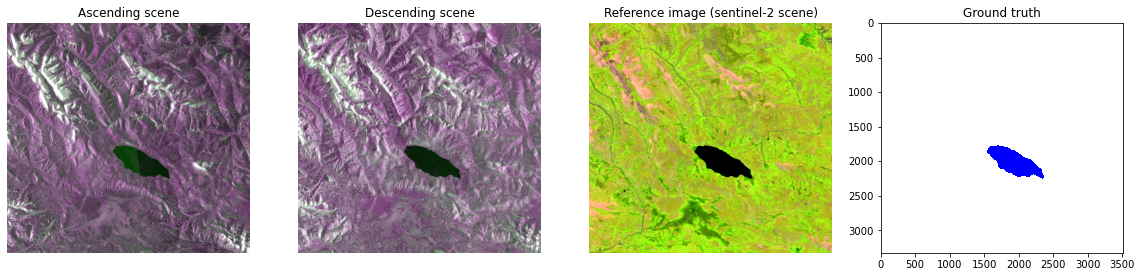

In [54]:
### check the scene and the truth
colors = ['white', 'blue'] 
cmap = mpl.colors.ListedColormap(colors)

idx = 0
plt.figure(figsize=(20,12))
plt.subplot(1,4,1)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(0,1,0))
plt.title('Ascending image'); plt.axis('off')
# plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(2,3,2))
plt.title('Descending image'); plt.axis('off')
plt.subplot(1,4,3)
imgShow(s2_imgs[idx], color_bands=(4,3,2))
plt.title('Reference image (sentinel-2 image)'); plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(truths[idx], cmap=cmap)
plt.title('Ground truth'); plt.axis('off') 

idx = 1
plt.figure(figsize=(20,12))
plt.subplot(1,4,1)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(0,1,0))
plt.title('Ascending scene'); plt.axis('off')
# plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(2,3,2))
plt.title('Descending scene'); plt.axis('off')
plt.subplot(1,4,3)
imgShow(s2_imgs[idx], color_bands=(4,3,2))
plt.title('Reference image (sentinel-2 scene)'); plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(truths[idx], cmap=cmap)
plt.title('Ground truth'); plt.axis('off') 

idx = 2
plt.figure(figsize=(20,12))
plt.subplot(1,4,1)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(0,1,0))
plt.title('Ascending scene'); plt.axis('off')
# plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2)
imgShow(s1_scenes[idx], clip_percent=1, per_band_clip=True, color_bands=(2,3,2))
plt.title('Descending scene'); plt.axis('off')
plt.subplot(1,4,3)
imgShow(s2_imgs[idx], color_bands=(4,3,2))
plt.title('Reference image (sentinel-2 scene)'); plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(truths[idx], cmap=cmap)
plt.title('Ground truth');
# plt.axis('off') 
# plt.xticks([]), plt.yticks([])


(-0.5, 263.5, 263.5, -0.5)

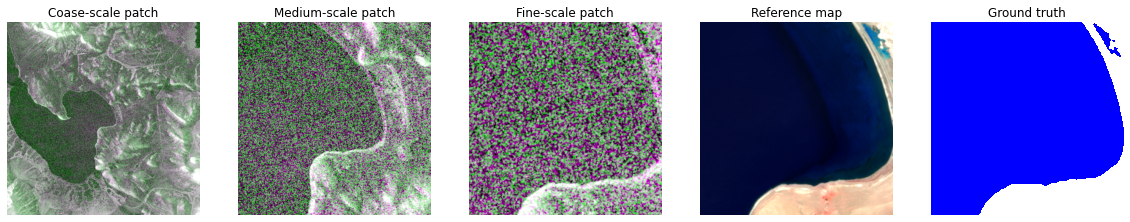

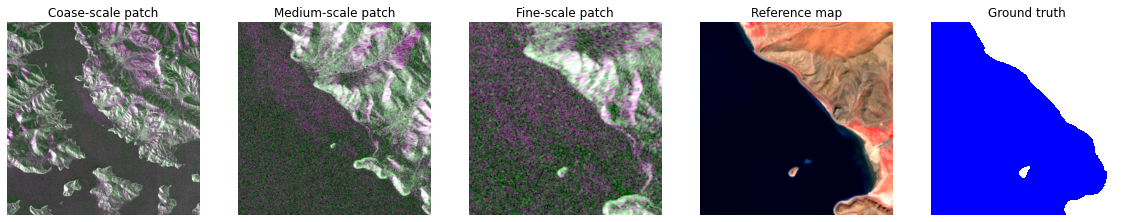

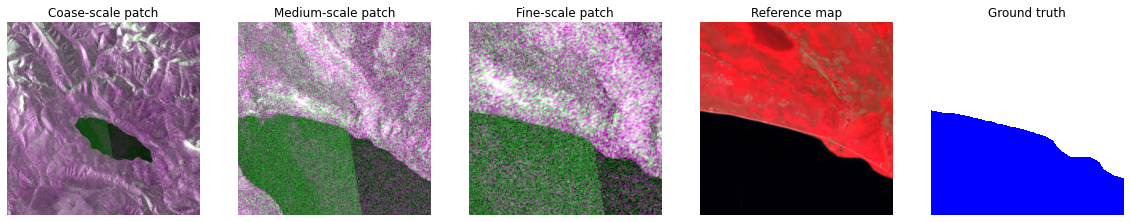

In [50]:
### check the multiscale patch
dif_med, dif_high = 764, 892
idx = 0
focus_region_h = [758, 2806, 808, 2856]
focus_region_m = [758+dif_med, 2806-dif_med, 808+dif_med, 2856-dif_med]
focus_region_l = [758+dif_high, 2806-dif_high, 808+dif_high, 2856-dif_high]
plt.figure(figsize=(20,14))
plt.subplot(1,5,1)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_h)
plt.title('Coase-scale patch'); plt.axis('off')
plt.subplot(1,5,2)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_m)
plt.title('Medium-scale patch'); plt.axis('off')
plt.subplot(1,5,3)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_l)
plt.title('Fine-scale patch'); plt.axis('off')
plt.subplot(1,5,4)
imgShow(s2_imgs[idx], color_bands=(3,2,1), clip_percent=2, per_band_clip=False, focus_pix=focus_region_l)
plt.title('Reference map'); plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(truths[idx][focus_region_l[0]:focus_region_l[1],focus_region_l[2]:focus_region_l[3]], cmap=cmap)
plt.title('Ground truth'); plt.axis('off')


idx = 1
focus_region_h = [600, 2648, 300, 2348]
focus_region_m = [600+dif_med, 2648-dif_med, 300+dif_med, 2348-dif_med]
focus_region_l = [600+dif_high, 2648-dif_high, 300+dif_high, 2348-dif_high]
plt.figure(figsize=(20,14))
plt.subplot(1,5,1)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_h)
plt.title('Coase-scale patch'); plt.axis('off')
plt.subplot(1,5,2)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_m)
plt.title('Medium-scale patch'); plt.axis('off')
plt.subplot(1,5,3)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_l)
plt.title('Fine-scale patch'); plt.axis('off')
plt.subplot(1,5,4)
imgShow(s2_imgs[idx], color_bands=(3,2,1), clip_percent=2, per_band_clip=False, focus_pix=focus_region_l)
plt.title('Reference map'); plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(truths[idx][focus_region_l[0]:focus_region_l[1],focus_region_l[2]:focus_region_l[3]], cmap=cmap)
plt.title('Ground truth'); plt.axis('off')


idx = 2
focus_region_h = [758, 2806, 808, 2856]
focus_region_m = [758+dif_med, 2806-dif_med, 808+dif_med, 2856-dif_med]
focus_region_l = [758+dif_high, 2806-dif_high, 808+dif_high, 2856-dif_high]
plt.figure(figsize=(20,14))
plt.subplot(1,5,1)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_h)
plt.title('Coase-scale patch'); plt.axis('off')
plt.subplot(1,5,2)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_m)
plt.title('Medium-scale patch'); plt.axis('off')
plt.subplot(1,5,3)
imgShow(s1_ass[idx], color_bands=(0,1,0), clip_percent=1, per_band_clip=True, focus_pix=focus_region_l)
plt.title('Fine-scale patch'); plt.axis('off')
plt.subplot(1,5,4)
imgShow(s2_imgs[idx], color_bands=(3,2,1), clip_percent=2, per_band_clip=False, focus_pix=focus_region_l)
plt.title('Reference map'); plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(truths[idx][focus_region_l[0]:focus_region_l[1],focus_region_l[2]:focus_region_l[3]], cmap=cmap)
plt.title('Ground truth'); plt.axis('off')
# plt.savefig(config.root_proj + '/figure/dset_sam_16.png', bbox_inches='tight')

